In [1]:
# lib standart
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk split data
from sklearn.model_selection import train_test_split

# Untuk Algoritma ML yang akan di pakai
from sklearn.linear_model import LinearRegression

# untuk impute nilai kosong
from sklearn.impute import SimpleImputer

# untuk scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures

# untuk one hot data kategorik
from sklearn.preprocessing import OneHotEncoder

# untuk PCA
from sklearn.decomposition import PCA

# untuk membangun pipeline ML
from sklearn.pipeline import Pipeline

# bagian dari pipe line untuk handling kolom 
from sklearn.compose import ColumnTransformer

# untuk tuning hyperparameter
from sklearn.model_selection import GridSearchCV

# menghitung nilai mae and accuracy_score
from sklearn.metrics import mean_absolute_error

# menyimpan model
import pickle

In [2]:
# Attributes Description:
# POSTED_BY - Category marking who has listed the property
# UNDER_CONSTRUCTION - Under Construction or Not
# RERA - Rera approved or Not
# BHK_NO - Number of Rooms
# BHK_OR_RK - Type of property
# SQUARE_FT - Total area of the house in square feet
# READY_TO_MOVE - Category marking Ready to move or Not
# RESALE - Category marking Resale or not
# ADDRESS - Address of the property
# LONGITUDE - Longitude of the property
# LATITUDE - Latitude of the property

In [3]:
train = pd.read_csv('Dataset/Train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
test = pd.read_csv('Dataset/Test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


# Analize train data

In [5]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [6]:
corre = train.corr().sort_values('TARGET(PRICE_IN_LACS)', ascending=False)[['TARGET(PRICE_IN_LACS)']]
corre

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1924\1640909099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = train.corr().sort_values('TARGET(PRICE_IN_LACS)', ascending=False)[['TARGET(PRICE_IN_LACS)']]


,TARGET(PRICE_IN_LACS)
TARGET(PRICE_IN_LACS),1.000000
SQUARE_FT,0.402685
BHK_NO.,0.112283
RERA,0.067636
UNDER_CONSTRUCTION,0.055399
LATITUDE,-0.017254
LONGITUDE,-0.031112
READY_TO_MOVE,-0.055399
RESALE,-0.207378


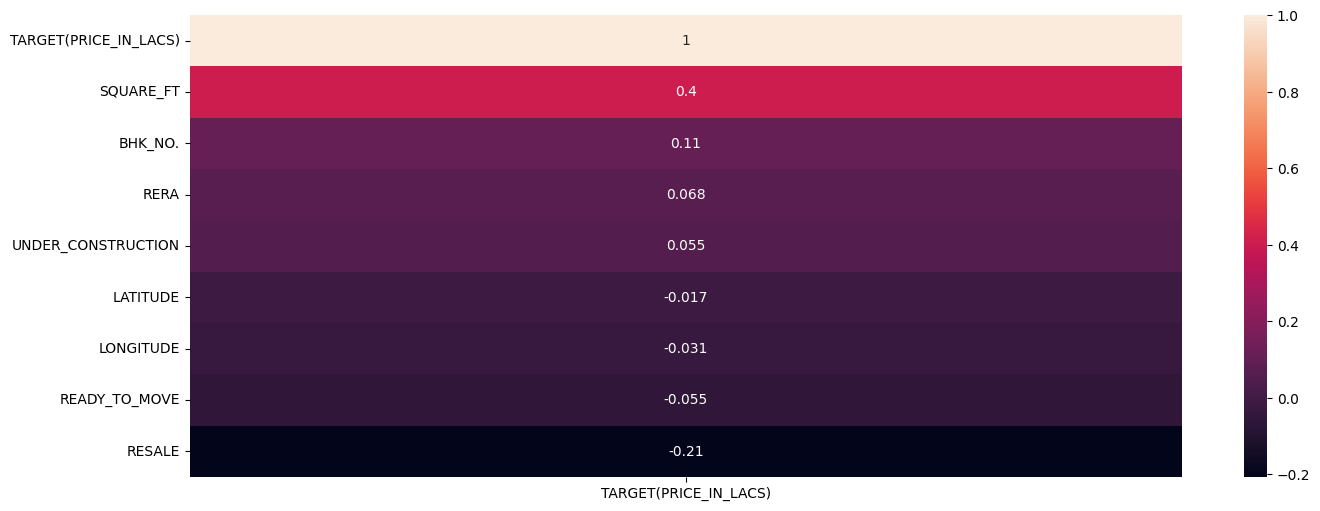

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(data=corre, annot=True)
plt.show()

In [8]:
def bar_chart(unik):
    bars = unik.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribusi Nilai pada Kolom')
    plt.xlabel('Nilai Unik')
    plt.ylabel('Jumlah Kemunculan')
    plt.xticks(rotation=0)  # Rotasi label x-axis
    plt.tight_layout()  # Ajust layout

    # Menambahkan angka di atas setiap batang
    for bar in bars.patches:
        yval = bar.get_height()
        bars.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    # Menampilkan grafik
    plt.show()

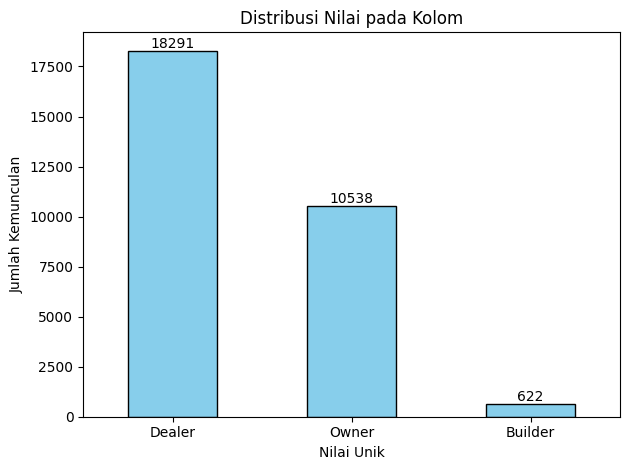

In [9]:
unik = train['POSTED_BY'].value_counts()

bar_chart(unik)

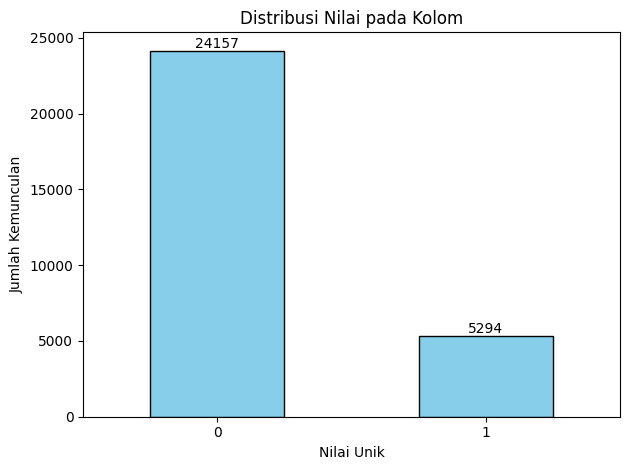

In [10]:
unik = train['UNDER_CONSTRUCTION'].value_counts()

bar_chart(unik)

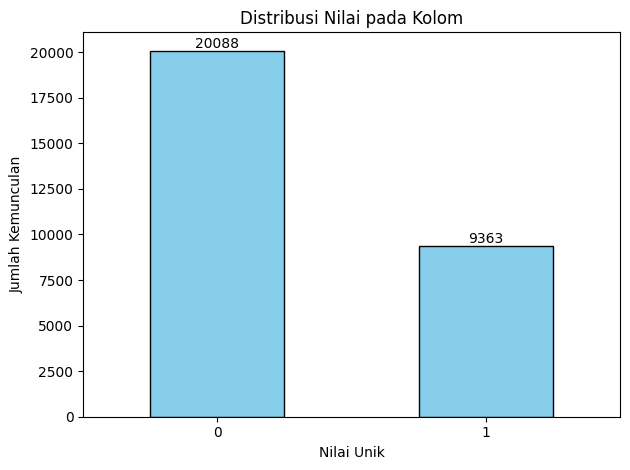

In [11]:
unik = train['RERA'].value_counts()

bar_chart(unik)

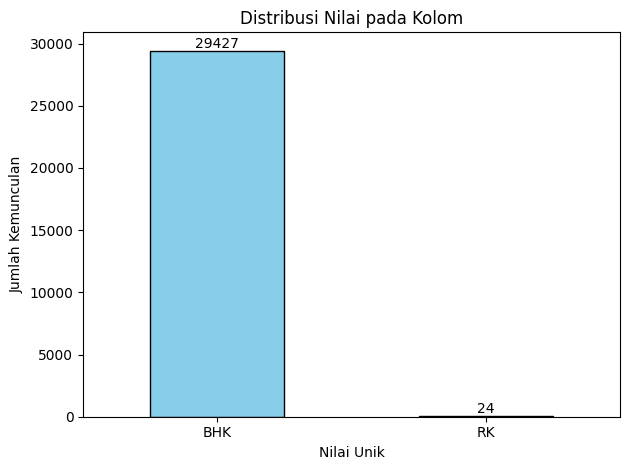

In [12]:
unik = train['BHK_OR_RK'].value_counts()

bar_chart(unik)

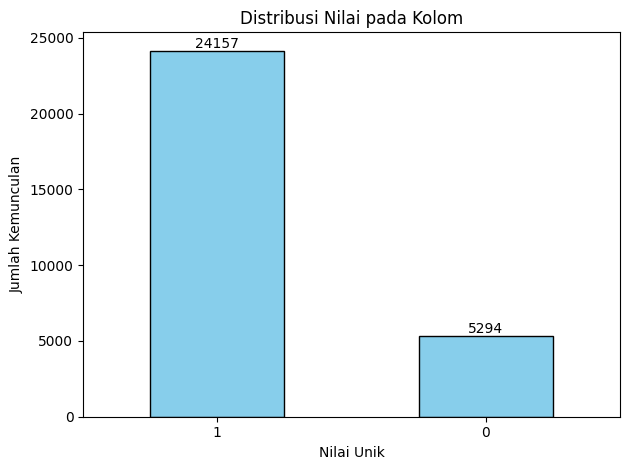

In [13]:
unik = train['READY_TO_MOVE'].value_counts()

bar_chart(unik)

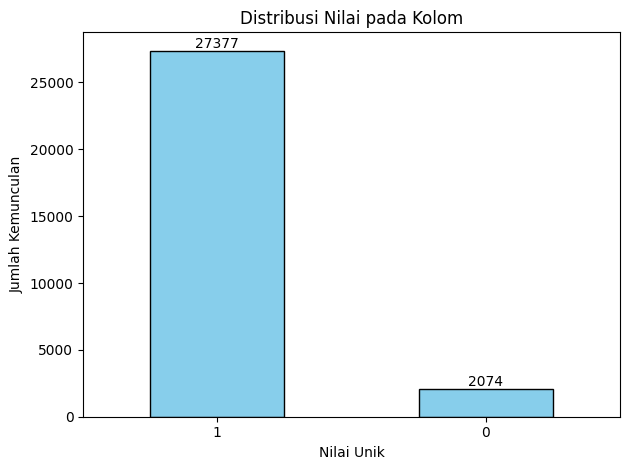

In [14]:
unik = train['RESALE'].value_counts()

bar_chart(unik)

# Train-Test split

In [15]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [16]:
X = train.drop(['TARGET(PRICE_IN_LACS)'], axis=1)
y = train['TARGET(PRICE_IN_LACS)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

# Create PipiLine

In [18]:
# categorical_pipeline

categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder())
    ])

list_categoric = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']

In [19]:
# numerical_pipeline

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('poli', PolynomialFeatures(2)),
        ('scaler', RobustScaler())
    ])


list_numeric = ['SQUARE_FT', 'LONGITUDE', 'LATITUDE', ]

In [20]:
# preprocessor

preprocessor = ColumnTransformer([
        ('numeric', numerical_pipeline, list_numeric),
        ('categoric', categorical_pipeline, list_categoric)
    ])

In [21]:
model_LR = Pipeline([
        ('preprocessor', preprocessor),
        ('algoritma', LinearRegression())
    ])

In [22]:
parameters = {
    'algoritma__fit_intercept': [True, False]
}

model = GridSearchCV(model_LR, parameters, cv = 5)

# Train

In [23]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1.94 s
Wall time: 3.03 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('poli',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['SQUARE_FT',
                                                                          'LONGITUDE',
                                                                          'LATITUDE']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['POSTED_BY',
                                                                          'UNDER_CONSTRUCTION',
                                                                          'RERA',
                                                                          'BHK_OR_RK',
                                                                          'READY_TO_MOVE',
                                                                          'RESALE'])])),
                                       ('algoritma', LinearRegression())]),
             param_grid={'algoritma__fit_intercept': [True, False]})

In [24]:
model.best_params_

{'algoritma__fit_intercept': True}

# Save Model

In [25]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# Evaluate Train

In [26]:
y_pred = model.predict(X_train)

df_pred = pd.DataFrame()
df_pred['y'] = y_train
df_pred['y_pred'] = y_pred

df_pred.head()

,y,y_pred
12017,150.0,130.899959
5156,110.0,39.190949
1925,160.0,130.441857
14641,160.0,140.980626
6769,26.0,53.212538


In [27]:
mae_train = mean_absolute_error(y_train, y_pred)
mae_train

133.286010215841

# Evaluate Test

In [28]:
y_pred = model.predict(X_test)

df_pred = pd.DataFrame()
df_pred['y'] = y_test
df_pred['y_pred'] = y_pred

df_pred.head()

,y,y_pred
15110,59.0,-74.633030
11828,36.7,163.345570
23585,100.0,179.099010
976,35.0,76.694378
2820,17.6,126.307213


In [29]:
mae_train = mean_absolute_error(y_test, y_pred)
mae_train

173.34166263033103